# Heart Disease Prediction using Original Dataset

## Import Packages

In [2]:
# Data Wrangling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing and Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Feature Engineering
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, Lasso

# ML Rrgression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# set display
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

## Load Datasets

In [3]:
def load_data(data_path):
    """Function that loads data
    arg:
    data_path - path to the dataset
    """
    df = pd.read_csv(data_path)
    display(df.head())
    return df

In [6]:
# Load file
data_path = "~/Documents/ML_competitioons/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/"
train = load_data(data_path + 'Train_Dataset.csv')
test = load_data(data_path + 'Test_Dataset.csv')
sample_sub = load_data(data_path + 'Sample_Submission.csv')

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


,Id
0,16501
1,10444
2,14288
3,10409
4,17330


## Data Preparation

In [7]:
# change column names to lower case
train.columns = [col.lower() for col in train.columns]

### Train/Test data assessment

In [5]:
# Check train info
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  

- Both training and test data contains no missing values

In [6]:
# Check for duplicates in train and test dataset

print(f'Duplicate in train: {train.duplicated().sum()}')
print(f'Duplicate in test: {test.duplicated().sum()}')

Duplicate in train: 0
Duplicate in test: 0


In [7]:
# Check summary stats of train and test data
display(train.describe().T)
display(test.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,7303.0,15021.535396,2886.026080,10001.0,12521.5,15054.0,17513.5,19998.0
age,7303.0,53.172669,14.185970,29.0,41.0,53.0,65.0,77.0
sex,7303.0,0.499658,0.500034,0.0,0.0,0.0,1.0,1.0
cp,7303.0,1.502533,1.115594,0.0,1.0,1.0,3.0,3.0
trestbps,7303.0,147.447487,31.099538,94.0,120.0,148.0,174.0,200.0
chol,7303.0,342.805970,127.291998,126.0,231.0,341.0,450.0,564.0
fbs,7303.0,0.493085,0.499986,0.0,0.0,0.0,1.0,1.0
restecg,7303.0,1.013008,0.815806,0.0,0.0,1.0,2.0,2.0
thalach,7303.0,136.506093,38.141966,71.0,104.0,137.0,170.0,202.0
exang,7303.0,0.503218,0.500024,0.0,0.0,1.0,1.0,1.0


,count,mean,std,min,25%,50%,75%,max
id,2697.0,14939.832036,2888.940621,10000.0,12455.0,14854.0,17465.0,19999.0
age,2697.0,53.064516,14.350978,29.0,41.0,53.0,66.0,77.0
sex,2697.0,0.488691,0.499965,0.0,0.0,0.0,1.0,1.0
cp,2697.0,1.504264,1.112747,0.0,1.0,1.0,3.0,3.0
trestbps,2697.0,146.384872,30.640580,94.0,121.0,147.0,172.0,200.0
chol,2697.0,344.027809,127.265038,126.0,233.0,344.0,455.0,564.0
fbs,2697.0,0.497219,0.500085,0.0,0.0,0.0,1.0,1.0
restecg,2697.0,1.021135,0.811590,0.0,0.0,1.0,2.0,2.0
thalach,2697.0,135.993326,38.419913,71.0,103.0,136.0,170.0,202.0
exang,2697.0,0.484613,0.499856,0.0,0.0,0.0,1.0,1.0


### Exploratory Data Analysis (EDA)

#### Univariant EDA

In [8]:
# Check class balance in the target column
def class_balance(df, target):
    """Function to check class balance
    arg:
    df - dataframe
    target - target column
    """

    class_balance = df[target].value_counts(normalize=True)
    print(f"{class_balance}\n")
    sns.countplot(x=target, data=df)
    plt.title(f'{target} Class Balance')
    plt.show()

target
1    0.813501
0    0.186499
Name: proportion, dtype: float64



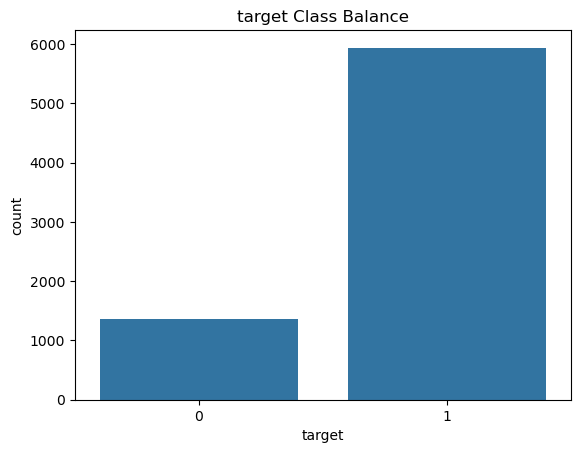

In [9]:
# Visualize class balance in the target column
class_balance(train, 'target')

- The classes in the `target` seems to be imbalance
- We may have to address the imbalance in the target

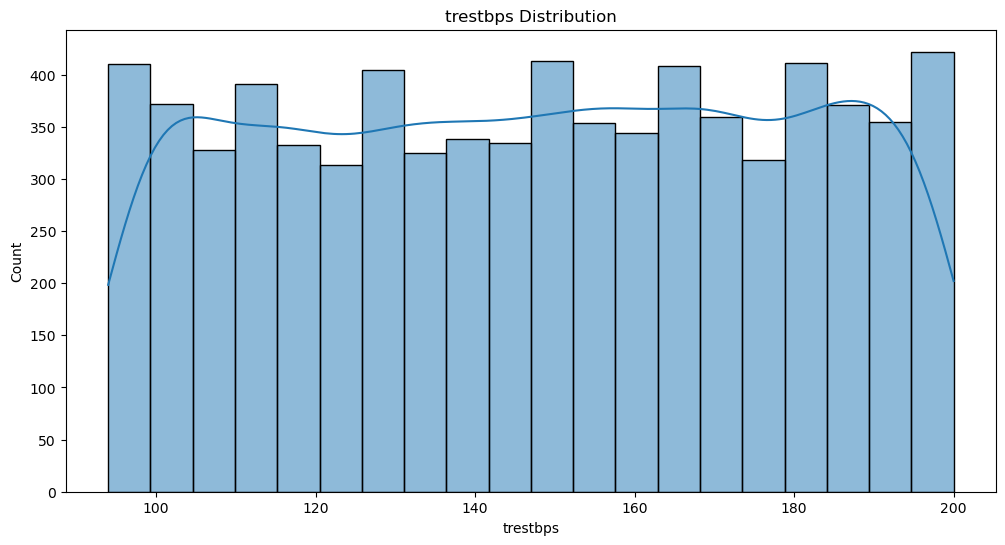

In [10]:
# feature distribution
def feature_distribution(df, feature):
    """Function to check feature distribution
    arg:
    df - dataframe
    feature - feature column
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

# Visualize feature distribution
feature_distribution(train, 'trestbps')


#### Bivariant EDA

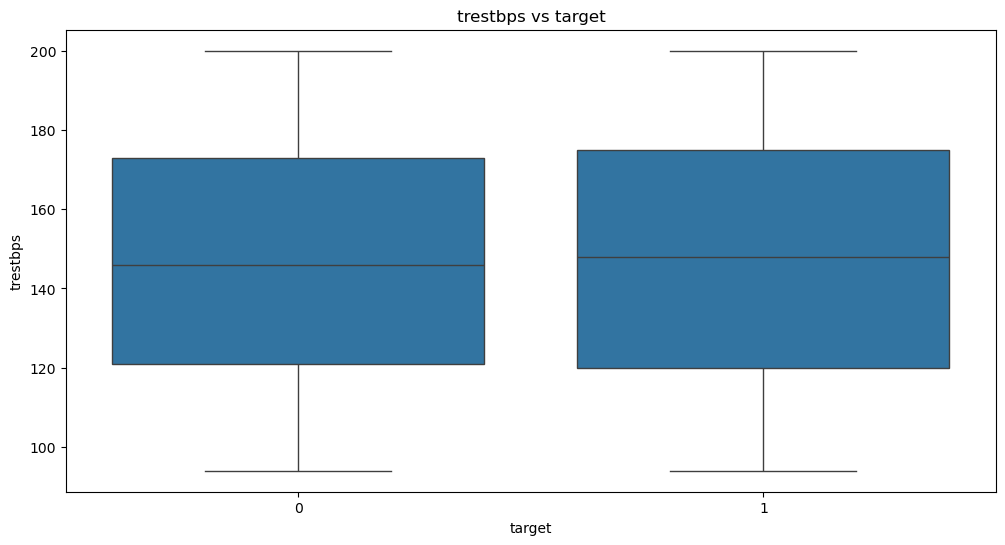

In [11]:
# check relationship between features and target
def feature_target_relationship(df, feature, target):
    """Function to check relationship between features and target
    arg:
    df - dataframe
    feature - feature column
    target - target column
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'{feature} vs {target}')
    plt.show()

feature_target_relationship(train, 'trestbps', 'target')


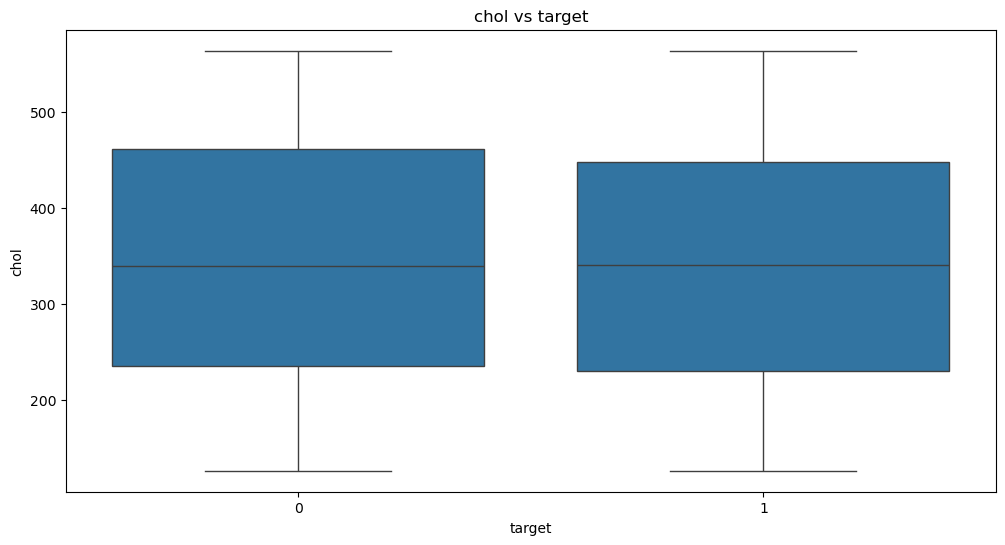

In [12]:
feature_target_relationship(train, 'chol', 'target')

#### Multvariant EDA

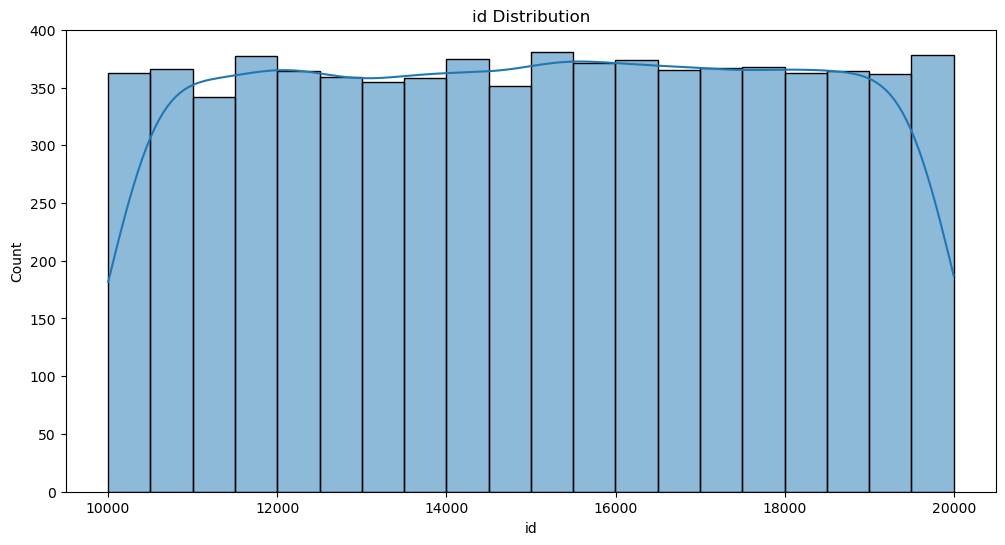

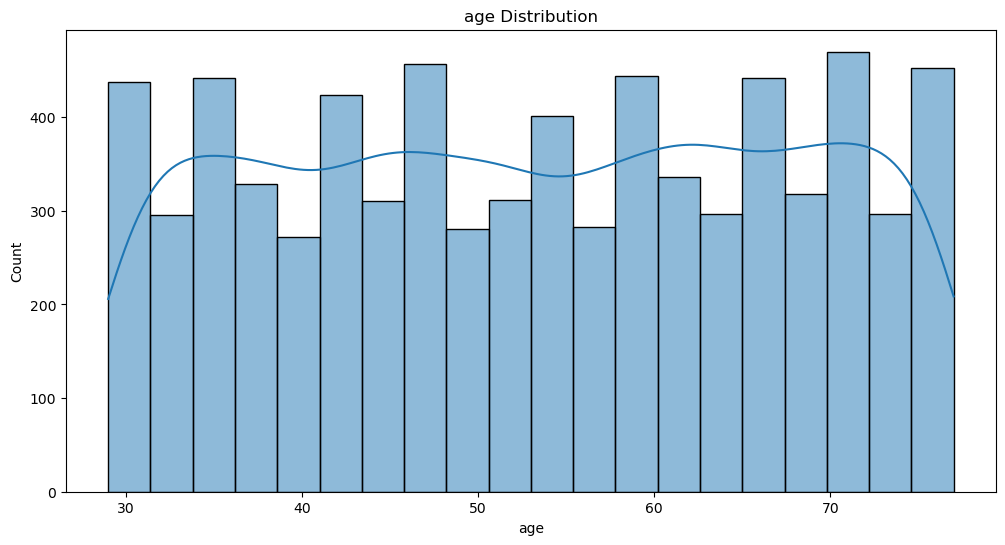

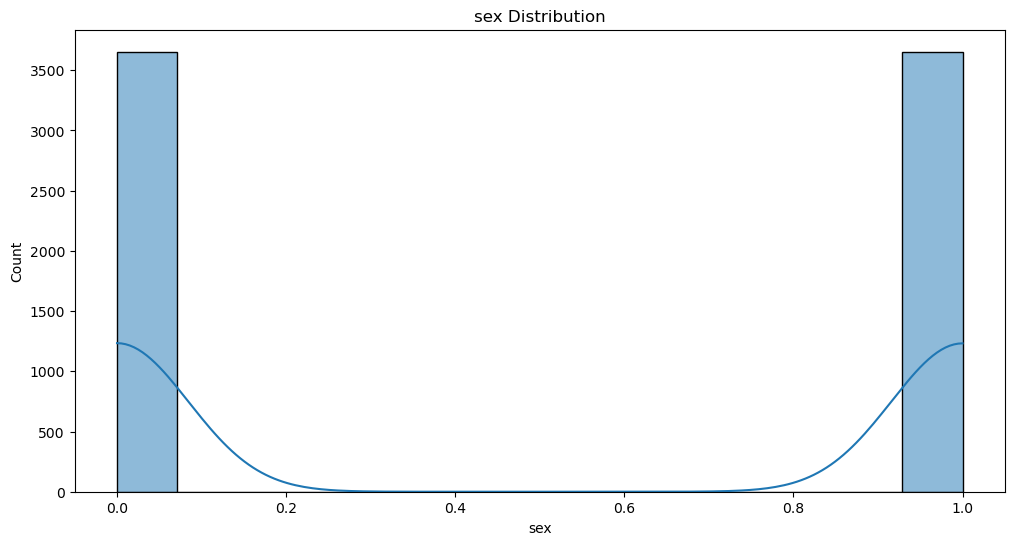

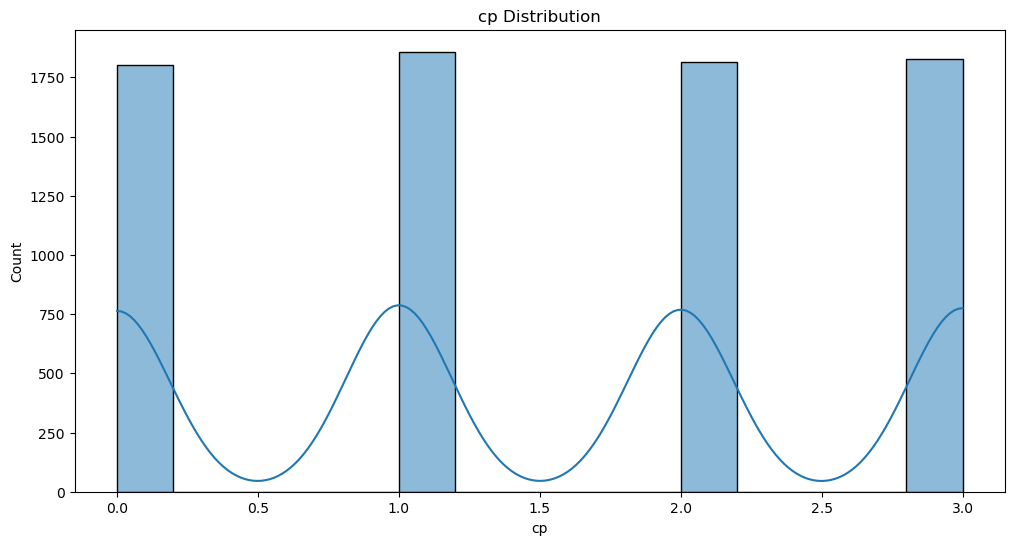

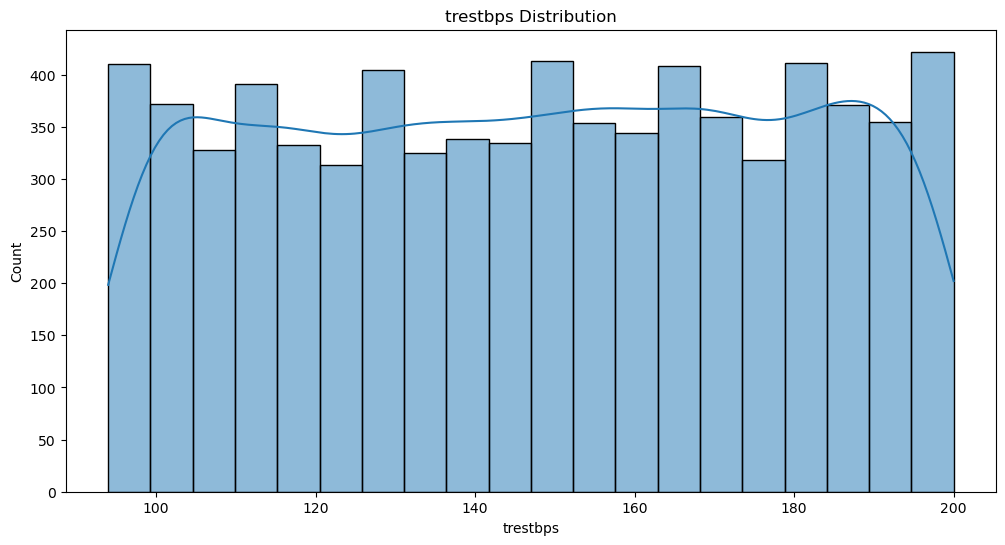

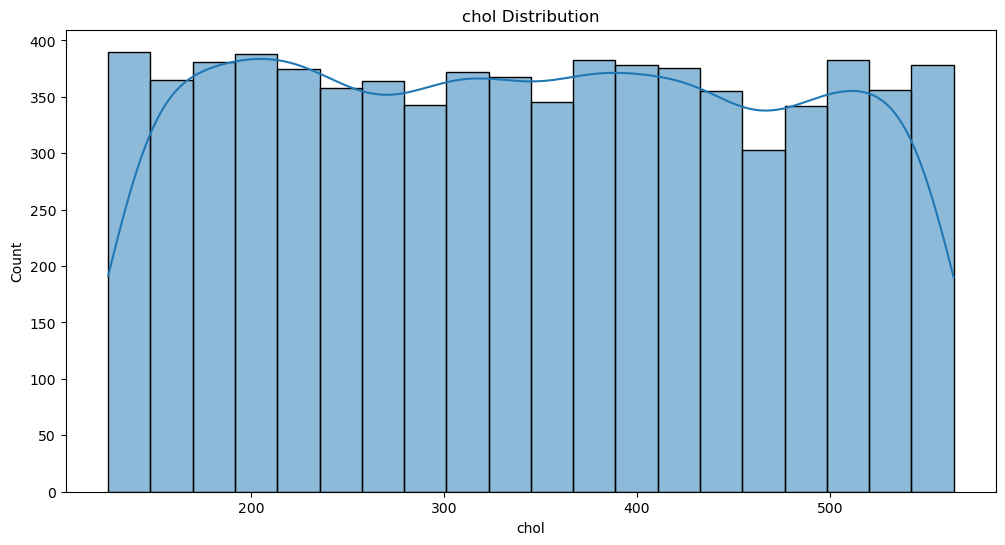

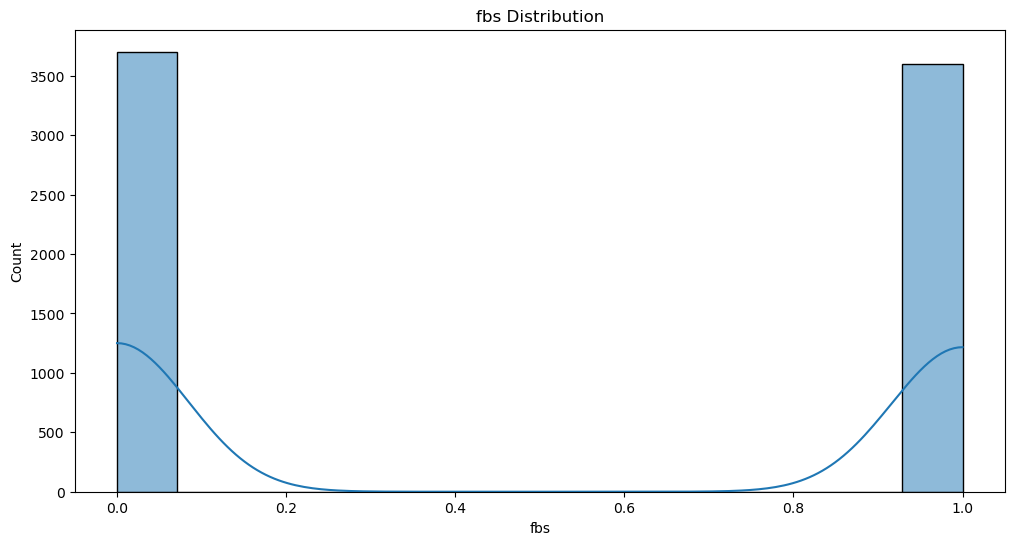

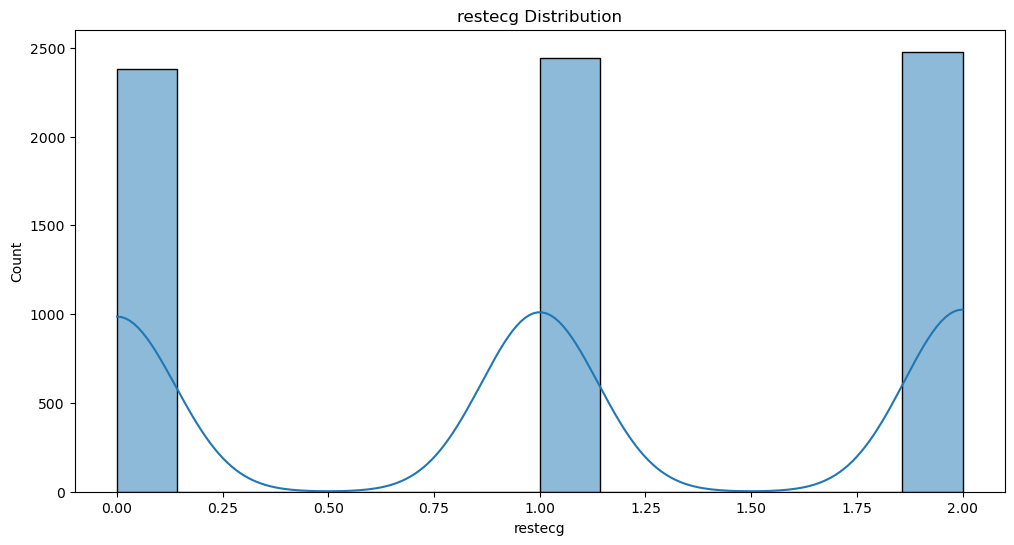

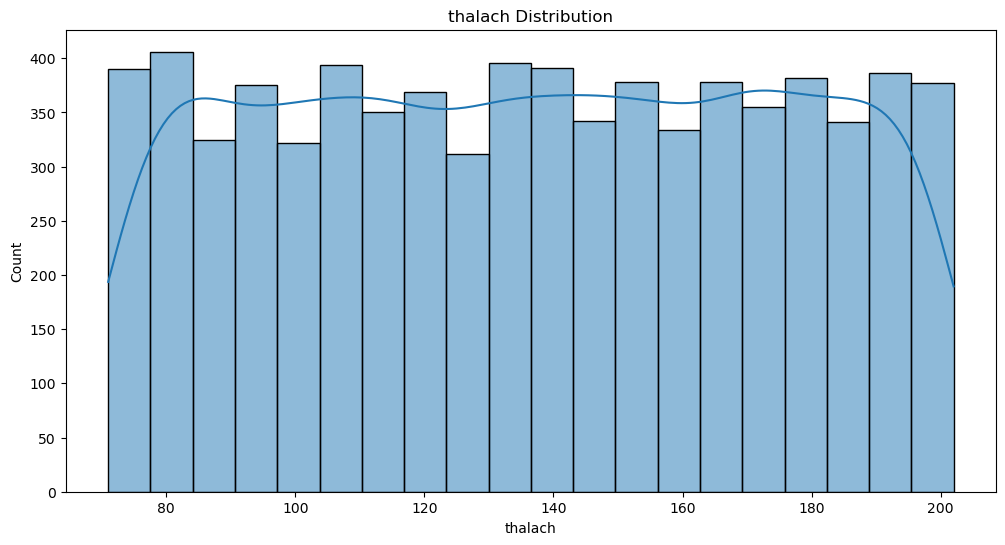

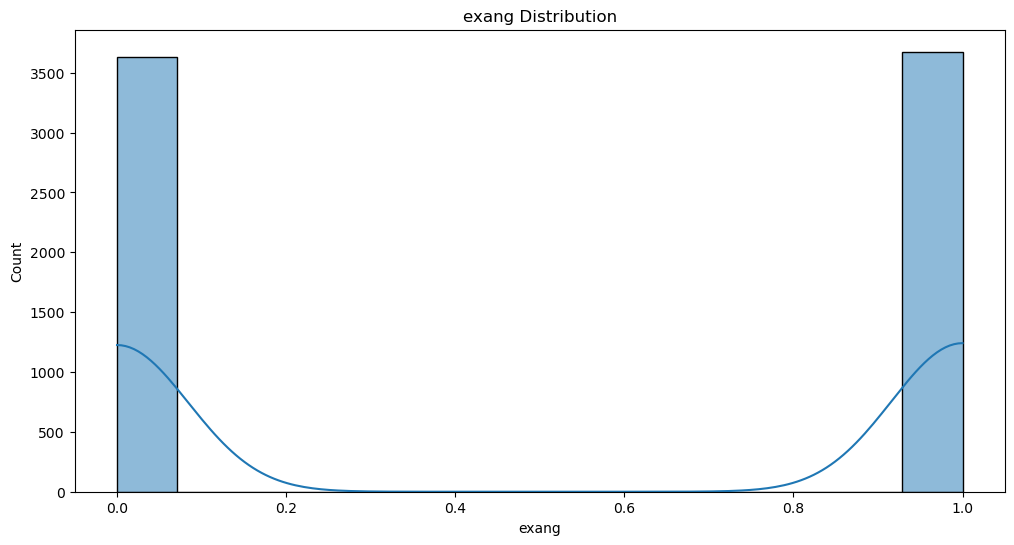

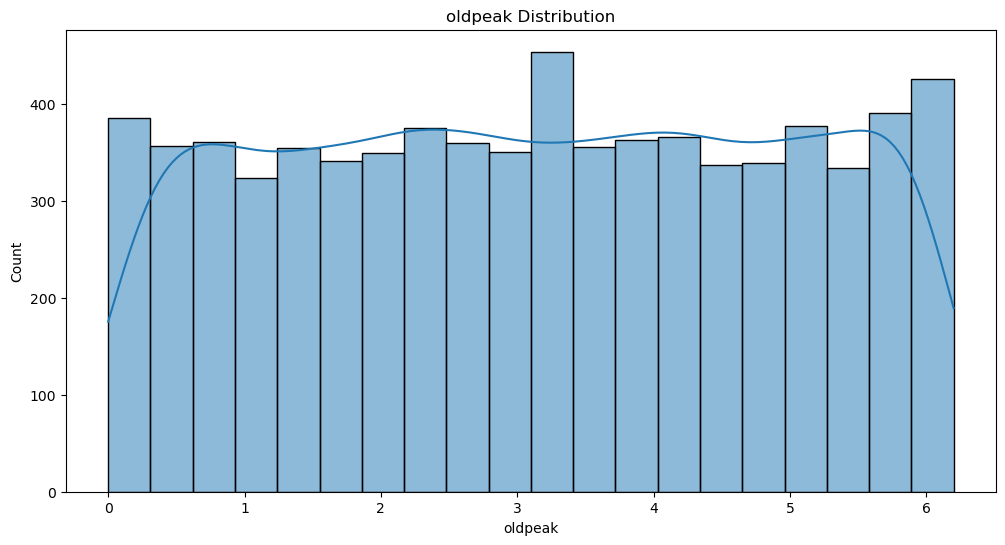

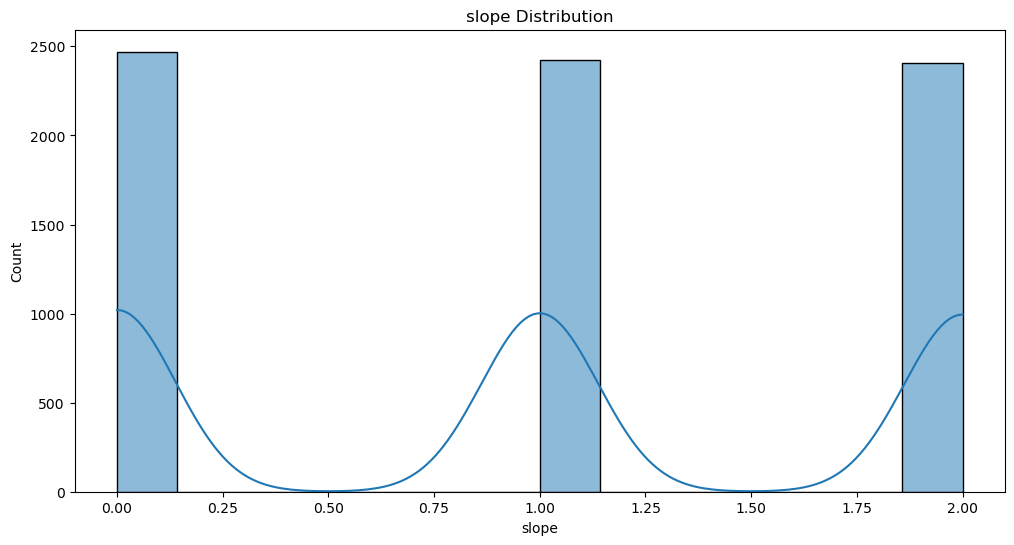

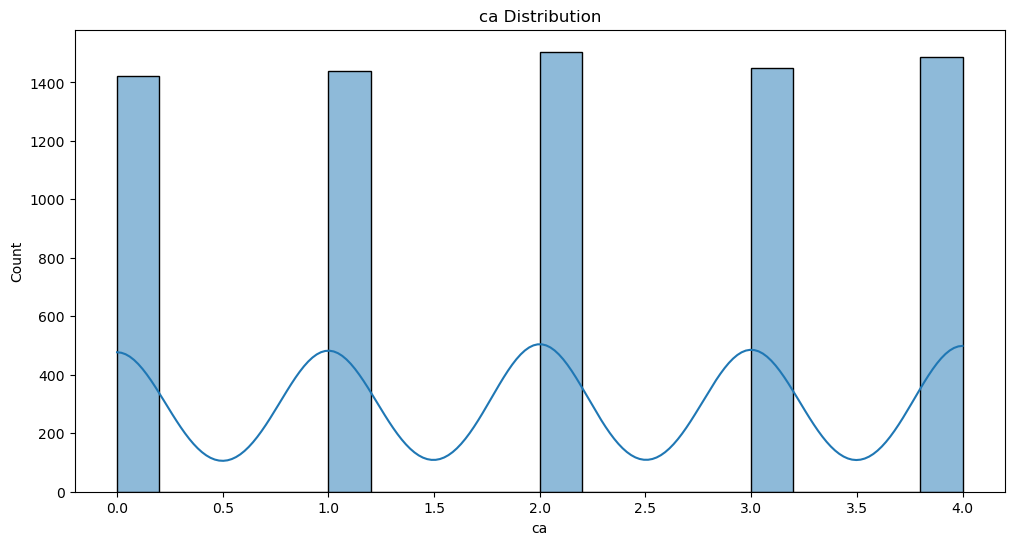

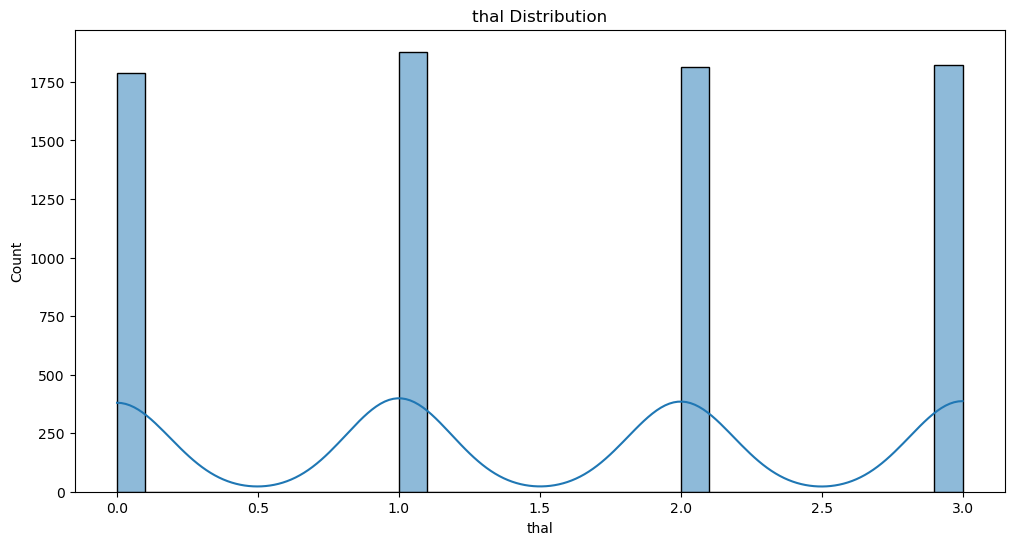

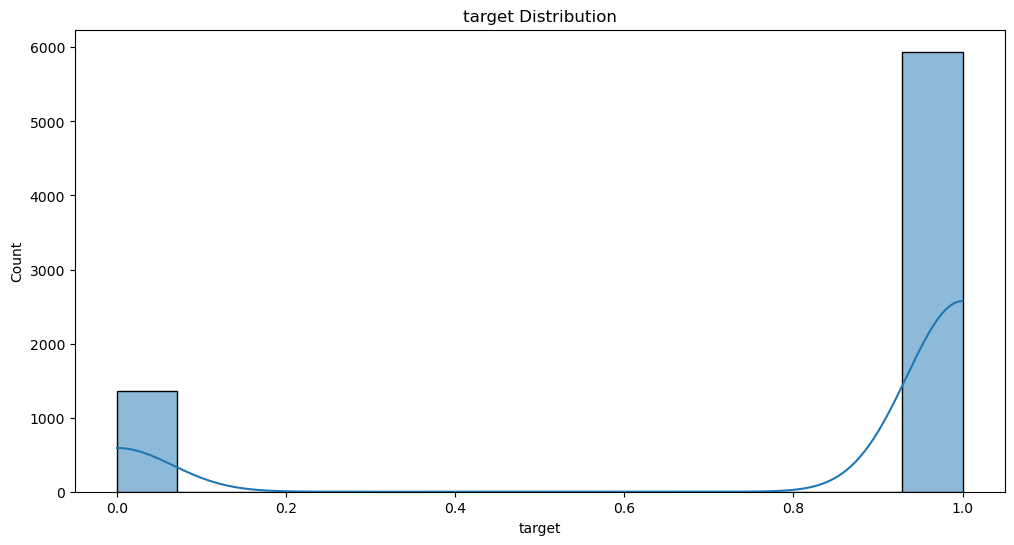

In [13]:
# Check distribution of each column
def check_distribution(df):
    """Function to check distribution of each column
    arg:
    df - dataframe
    """
    for col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'{col} Distribution')
        plt.show()

# Check distribution of each column
check_distribution(train)

In [14]:
# Correlation matrix heatmap
def correlation_heatmap(df):
    """Function to plot correlation heatmap
    arg:
    df - dataframe
    """
    df = df.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap')
    plt.show()

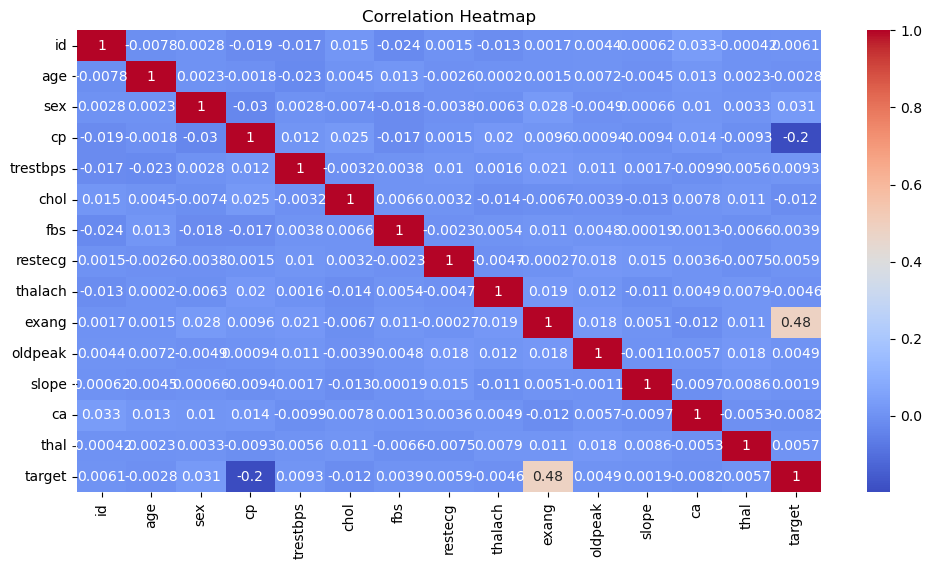

In [15]:
correlation_heatmap(train)

## Build ML Models

In [8]:
# Evaluate model using accuracy score
def evaluate_model(model, X_test, y_test):
    """Function to evaluate classification model
    arg:
    model - trained model
    X_test - test features
    y_test - test target
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

### Split Data for training

In [9]:
# Select X and y features for modelling
def select_features(df):
    """Function to select features for modelling
    arg:
    df - dataframe
    """
    X = df.drop(['target', 'id'], axis=1)
    y = df['target']
    print(f"X shape: {X.shape} y shape: {y.shape}")
    return X, y

# Select features for modelling
X, y = select_features(train)

X shape: (7303, 13) y shape: (7303,)


In [10]:
# Split data to train and test
def split_data(X, y, test_size=0.3):
    """Function to split data to train and test
    arg:
    X - features
    y - target
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"X_train shape: {X_train.shape} X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape} y_test shape: {y_test.shape}")
    return X_train, X_test, y_train, y_test

# Split data to train and test
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)

X_train shape: (5112, 13) X_test shape: (2191, 13)
y_train shape: (5112,) y_test shape: (2191,)


### Baseline Model

In [11]:
# Predict all as the majority class
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Majority Class Accuracy: {accuracy}")

Majority Class Accuracy: 0.8160657234139662


### Initial Trial ML

Accuracy: 0.8124144226380648
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       403
           1       0.89      0.88      0.89      1788

    accuracy                           0.81      2191
   macro avg       0.69      0.69      0.69      2191
weighted avg       0.81      0.81      0.81      2191



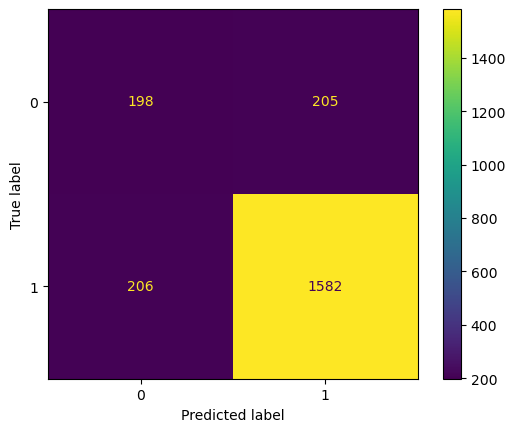

In [17]:
# Train classification model using LightGBM
lgbm_model = LGBMClassifier(
    learning_rate=0.5, 
    n_estimators=100,
    num_leaves=31, 
    max_depth=None,
    verbosity=-1, 
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(lgbm_model, X_test, y_test)

In [13]:
# Feature importance
def feature_importance(model, X):
    """Function to plot feature importance
    arg:
    model - trained model
    X - features
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x=model.feature_importances_, y=X.columns)
    plt.title('Feature Importance')
    plt.show()

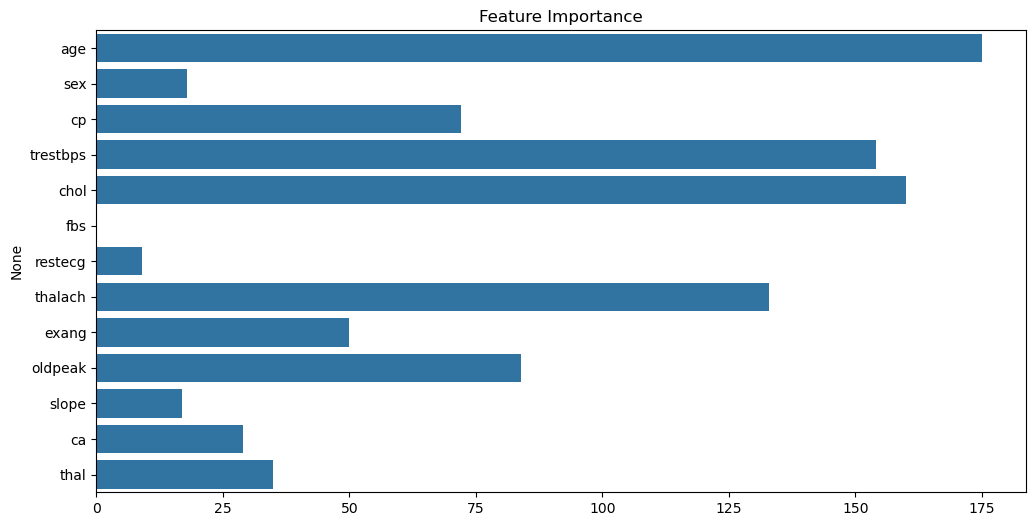

In [14]:
# Plot feature importance
feature_importance(lgbm_model, X)

### Build Class for Training

In [15]:
# Train classification model using LightGBM

class TrainModel:

    def __init__(self, model, params, cv=5, scoring='accuracy'):
        self.model = model
        self.params = params
        self.cv = cv
        self.scoring = scoring
        self.grid = None
        self.best_model = None

    # Grid search
    def grid_search(self, X_train, y_train):
        """Function to train classification model
        arg:
        X_train - train features
        y_train - train target
        """
        self.grid = GridSearchCV(self.model, self.params, cv=self.cv, scoring=self.scoring)
        self.grid.fit(X_train, y_train)
        self.best_model = self.grid.best_estimator_
        print(f'Best Parameters: {self.grid.best_params_}')
        print(f'Best Score: {self.grid.best_score_}')

    # Random search
    def random_search(self, X_train, y_train, n_iter=100):
        """Function to train classification model
        arg:
        X_train - train features
        y_train - train target
        """
        self.grid = RandomizedSearchCV(self.model, self.params, cv=self.cv, scoring=self.scoring, n_iter=n_iter)
        self.grid.fit(X_train, y_train)
        self.best_model = self.grid.best_estimator_
        print(f'Best Parameters: {self.grid.best_params_}')
        print(f'Best Score: {self.grid.best_score_}')
    
    # Train model
    def train_model(self, X_train, y_train):
        """Function to train classification model
        arg:
        X_train - train features
        y_train - train target
        """
        self.model.fit(X_train, y_train)

    # Evaluate model using accuracy scores
    def evaluate_model(self, X_test, y_test):
        """Function to evaluate classification model
        arg:
        X_test - test features
        y_test - test target
        """
        y_pred = self.best_model.predict(X_test)
        #y_pred = self.grid.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.best_model.classes_)
        disp.plot()
 

### LGBMClassifier

In [23]:
# Train classification model using LightGBM
def train_lgbm(X_train, y_train):
    """Function to train LightGBM model
    arg:
    X_train - training features
    y_train - training target
    """
    model = LGBMClassifier(random_state=42, verbosity=-1)   
    params = {
        'n_estimators': [50, 75, 100, 150],
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'max_depth': [3, 5, 7, 9],
        'num_leaves': [31, 45, 63, 75],
        'min_child_samples': [10, 20, 30, 40]
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'learning_rate': 0.01, 'max_depth': 9, 'min_child_samples': 40, 'n_estimators': 150, 'num_leaves': 31}
Best Score: 0.8123952681720708
Accuracy: 0.8138261464750172
              precision    recall  f1-score   support

           0       0.40      0.09      0.15       260
           1       0.83      0.97      0.90      1201

    accuracy                           0.81      1461
   macro avg       0.62      0.53      0.52      1461
weighted avg       0.75      0.81      0.76      1461



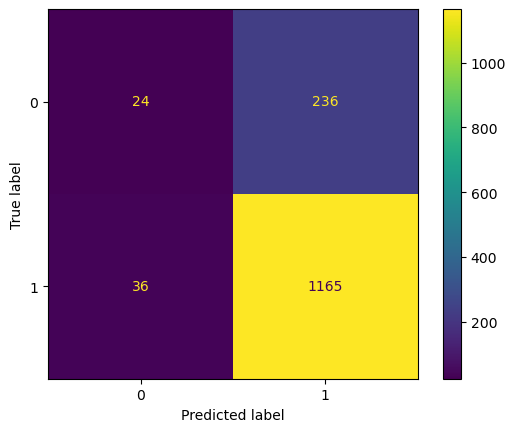

In [24]:
lgbm_trainer = train_lgbm(X_train, y_train)

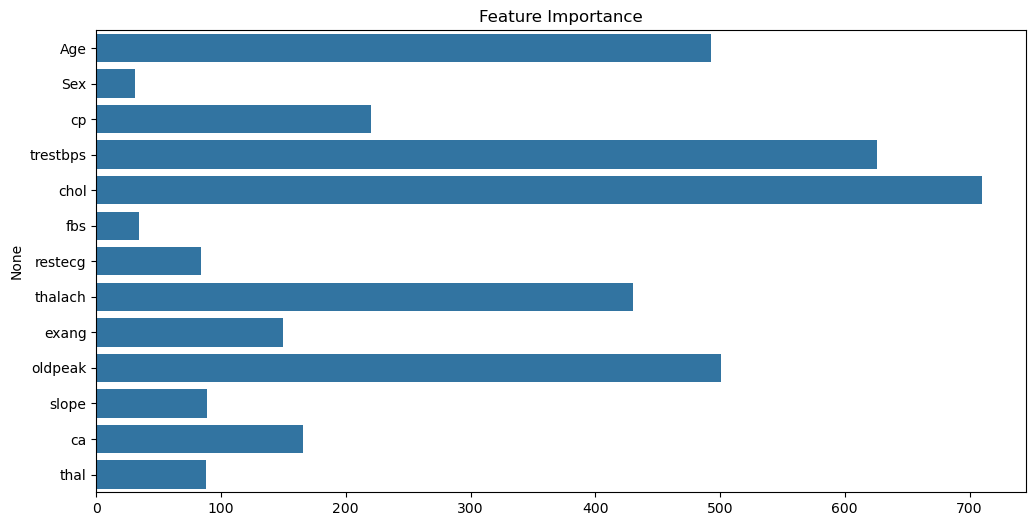

In [25]:
# Feature importance
feature_importance(lgbm_trainer, X)

### RandomForest

Accuracy: 0.806481058877225
              precision    recall  f1-score   support

           0       0.46      0.31      0.37       403
           1       0.86      0.92      0.89      1788

    accuracy                           0.81      2191
   macro avg       0.66      0.62      0.63      2191
weighted avg       0.78      0.81      0.79      2191



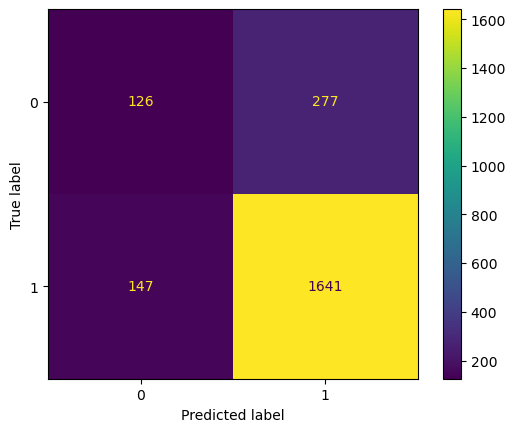

In [43]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(rf_model, X_test, y_test)

In [26]:
# Train classification model using Random Forest
def train_rf(X_train, y_train):
    """Function to train Random Forest model
    arg:
    X_train - training features
    y_train - training target
    """
    model = RandomForestClassifier(random_state=42)   
    params = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [3, 5, 7, 13],
        'min_samples_split': [2, 3, 5, 7],
        'min_samples_leaf': [0.5, 1, 2, 3],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8127356832323611
Accuracy: 0.8227241615331964
              precision    recall  f1-score   support

           0       0.52      0.04      0.08       260
           1       0.83      0.99      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.68      0.52      0.49      1461
weighted avg       0.77      0.82      0.76      1461



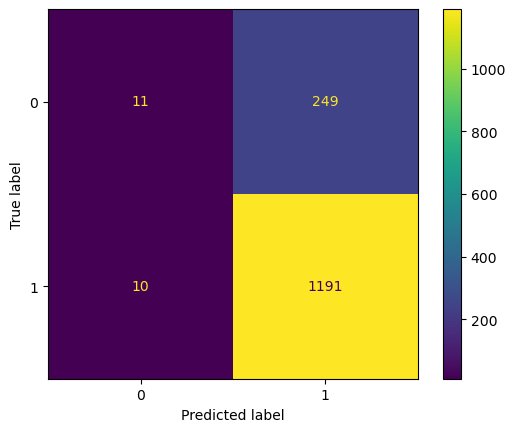

In [27]:
rf_trainer = train_rf(X_train, y_train)

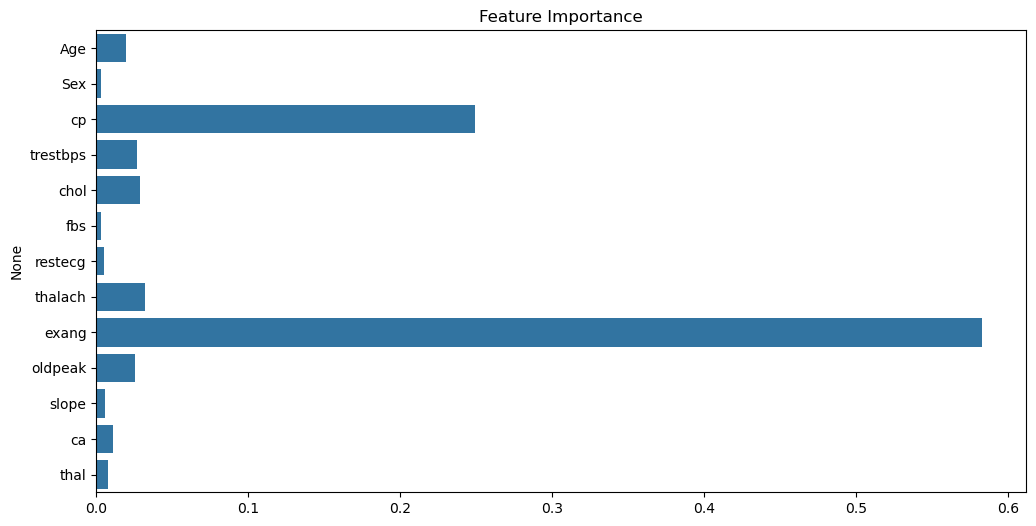

In [28]:
# Feature importance
feature_importance(rf_trainer, X)

### XGBoost

Accuracy: 0.806481058877225
              precision    recall  f1-score   support

           0       0.47      0.38      0.42       403
           1       0.87      0.90      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.67      0.64      0.65      2191
weighted avg       0.79      0.81      0.80      2191



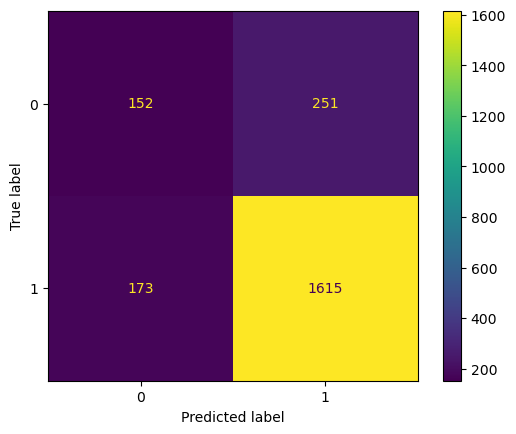

In [67]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=13,
    learning_rate=0.01,
    verbosity=0,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(xgb_model, X_test, y_test)

In [30]:
# Train classification model using XGBoost
def train_xgb(X_train, y_train):
    """Function to train XGBoost model
    arg:
    X_train - training features
    y_train - training target
    """
    model = XGBClassifier(random_state=42, verbosity=0)   
    params = {
        'n_estimators': [500, 700, 900, 1100],
        'learning_rate': [0.01, 0.05, 0.1, 0.12],
        'max_depth': [3, 5, 7],
        'subsample': [0.5, 1, 1.5],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8]
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 700, 'subsample': 0.5}
Best Score: 0.8125643038775678
Accuracy: 0.8145106091718002
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       260
           1       0.88      0.90      0.89      1201

    accuracy                           0.81      1461
   macro avg       0.68      0.67      0.67      1461
weighted avg       0.81      0.81      0.81      1461



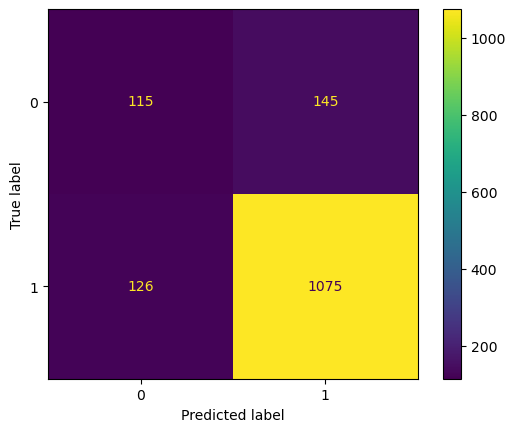

In [31]:
# Train XGBoost model
xgb_trainer = train_xgb(X_train, y_train)

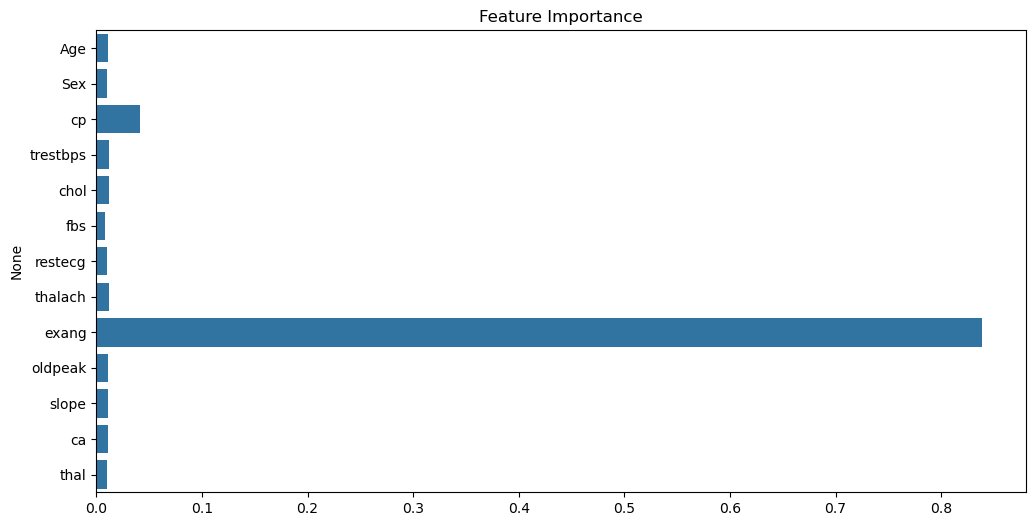

In [32]:
# Feature importance
feature_importance(xgb_trainer, X)

### CatBoost

Accuracy: 0.8156093108169785
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       403
           1       0.89      0.88      0.89      1788

    accuracy                           0.82      2191
   macro avg       0.70      0.70      0.70      2191
weighted avg       0.82      0.82      0.82      2191



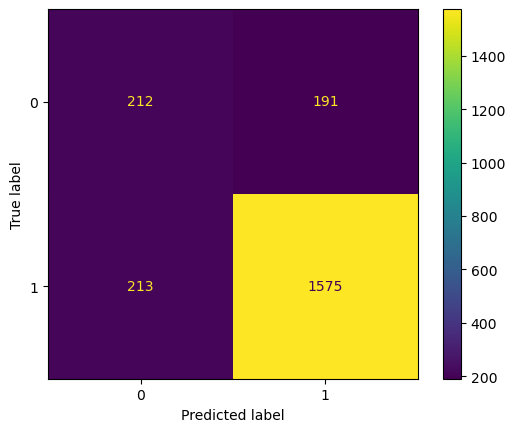

In [75]:
cat_model = CatBoostClassifier(
    n_estimators=100,
    max_depth=11,
    learning_rate=0.1,
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(cat_model, X_test, y_test)

In [35]:
# Train classification model using CatBoost use gpu
def train_cat(X_train, y_train):
    """Function to train CatBoost model
    arg:
    X_train - training features
    y_train - training target
    """
    model = CatBoostClassifier(random_state=42, verbose=0)   
    params = {
        'n_estimators': [100, 300, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1, 0.12],
        'max_depth': [3, 5, 7, 11],
        #'subsample': [0.5, 0.7, 0.9, 1],
        'colsample_bylevel': [0.3, 0.5, 0.7, 1]
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'colsample_bylevel': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8139338739351043
Accuracy: 0.8199863107460643
              precision    recall  f1-score   support

           0       0.36      0.02      0.03       260
           1       0.82      0.99      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.59      0.50      0.47      1461
weighted avg       0.74      0.82      0.75      1461



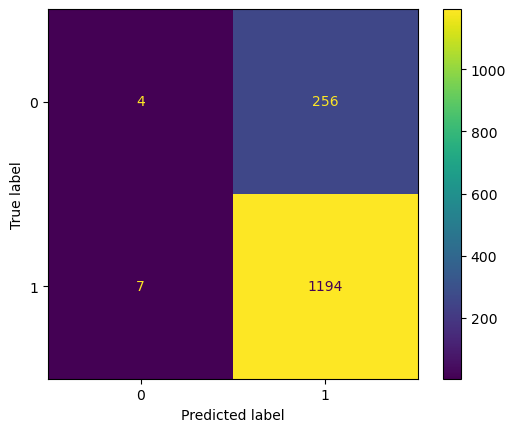

In [36]:
# Train CatBoost model
cat_trainer = train_cat(X_train, y_train)

In [ ]:
# Feature importance
feature_importance(cat_trainer, X)

### AdaBoost

Accuracy: 0.8119580100410771
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       403
           1       0.89      0.88      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.69      0.70      0.70      2191
weighted avg       0.82      0.81      0.81      2191



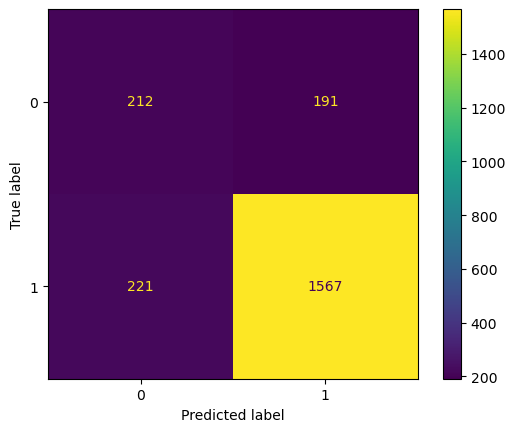

In [86]:
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(ada_model, X_test, y_test)

In [16]:
# Train classification model using AdaBoost
def train_ada(X_train, y_train):
    """Function to train AdaBoost model
    arg:
    X_train - training features
    y_train - training target
    """
    model = AdaBoostClassifier(random_state=42)   
    params = {
        'n_estimators': [500, 700, 900, 1100],
        'learning_rate': [0.1, 0.12, 0.15, 0.2]
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

In [ ]:
# Train AdaBoost model
ada_trainer = train_ada(X_train, y_train)

In [ ]:
# Feature importance
feature_importance(ada_trainer, X)

### Scaled Data

In [16]:
# Scale the data
def scale_data(X_train, X_test):
    """Function to scale data
    arg:
    X_train - training features
    X_test - test features
    """
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    return X_train_scaled, X_test_scaled, scaler

In [88]:
# Scale the data
X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test)
X_train_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.520833,1.0,0.000000,0.386792,0.436073,0.0,0.0,0.625954,0.0,0.048387,0.0,0.25,0.000000
1,0.479167,1.0,0.000000,0.622642,0.317352,0.0,1.0,0.893130,0.0,0.822581,0.0,0.75,0.333333
2,0.729167,1.0,0.666667,0.632075,0.502283,1.0,0.0,0.312977,0.0,0.016129,0.0,0.50,0.000000
3,0.354167,1.0,0.666667,0.632075,0.570776,1.0,1.0,0.427481,0.0,0.790323,0.0,1.00,0.000000
4,0.875000,1.0,1.000000,1.000000,0.164384,1.0,0.0,0.923664,1.0,0.935484,1.0,0.00,0.333333


In [90]:
# scale the test data
test_scaled = scaler.transform(test.drop('id', axis=1))
test_scaled = pd.DataFrame(test_scaled, columns=test.drop('id', axis=1).columns)
test_scaled = test['id'].to_frame().join(test_scaled)
test_scaled.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,0.854167,1.0,0.000000,0.650943,0.842466,0.0,1.0,0.755725,1.0,0.322581,0.5,0.00,0.333333
1,10444,0.666667,1.0,0.000000,0.349057,0.255708,0.0,1.0,0.022901,1.0,0.790323,1.0,0.50,0.666667
2,14288,0.500000,1.0,0.000000,0.009434,0.986301,1.0,0.5,0.015267,1.0,0.112903,0.5,0.25,0.000000
3,10409,0.166667,0.0,0.333333,0.792453,0.367580,0.0,0.5,0.923664,1.0,0.919355,0.5,0.00,0.000000
4,17330,0.125000,0.0,1.000000,0.094340,0.353881,0.0,0.0,0.389313,0.0,0.209677,0.5,1.00,1.000000


### KNN

Accuracy: 0.8069374714742127
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       403
           1       0.88      0.89      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.68      0.67      0.67      2191
weighted avg       0.80      0.81      0.81      2191



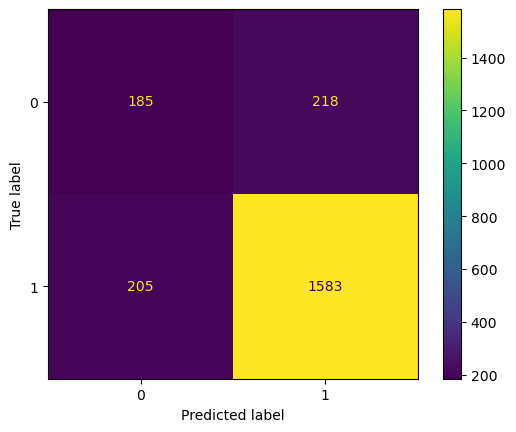

In [94]:
knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',
    algorithm='auto'
)
knn_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(knn_model, X_test_scaled, y_test)

In [105]:
# KNN model
def train_knn(X_train, y_train, X_test, y_test):
    """Function to train KNN model
    arg:
    X_train - training features
    y_train - training target
    """
    model = KNeighborsClassifier()   
    params = {
        'n_neighbors': np.arange(1, 21),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}
Best Score: 0.8122071035460341
Accuracy: 0.8078502966681881
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       403
           1       0.88      0.89      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.68      0.67      0.67      2191
weighted avg       0.80      0.81      0.81      2191



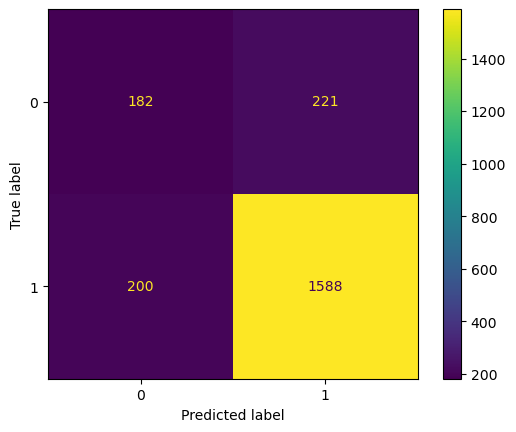

In [106]:
# Train KNN model with scaled data
knn_trainer = train_knn(X_train_scaled, y_train, X_test_scaled, y_test)

### Logistic Regression

Accuracy: 0.820629849383843
              precision    recall  f1-score   support

           0       0.52      0.32      0.40       403
           1       0.86      0.93      0.89      1788

    accuracy                           0.82      2191
   macro avg       0.69      0.63      0.65      2191
weighted avg       0.80      0.82      0.80      2191



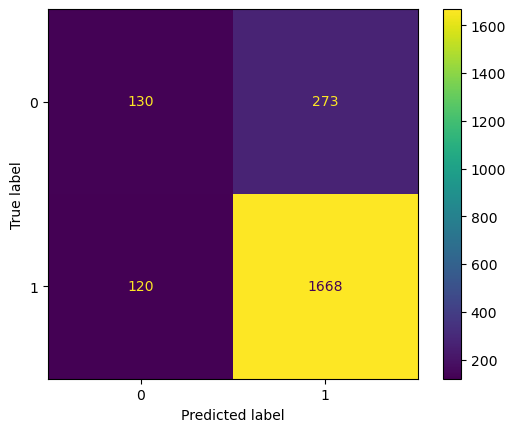

In [124]:
lr_model = LogisticRegression(
    C=1.0,
    max_iter=100,
    penalty='l2',
    solver='lbfgs',
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(lr_model, X_test_scaled, y_test)

In [112]:
# Train classification model using Logistic Regression
def train_lr(X_train, y_train, X_test, y_test):
    """Function to train Logistic Regression model
    arg:
    X_train - training features
    y_train - training target
    """
    model = LogisticRegression(random_state=42)   
    params = {
        'C': [1, 10, 100, 500, 1000],
        'max_iter': [100, 200, 300, 400],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return  trainer.best_model

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8112297777344176
Accuracy: 0.820629849383843
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       403
           1       0.86      0.93      0.89      1788

    accuracy                           0.82      2191
   macro avg       0.69      0.63      0.65      2191
weighted avg       0.80      0.82      0.80      2191



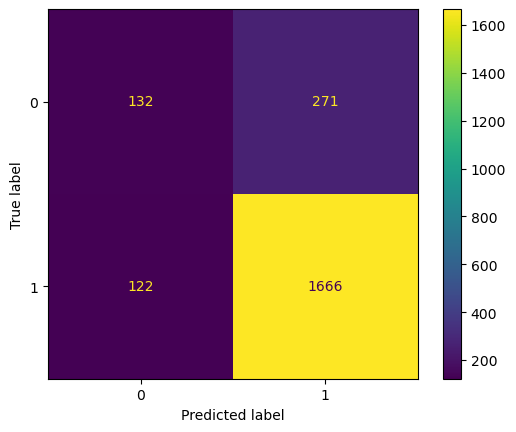

In [113]:
# Train Logistic Regression model with scaled data
lr_trainer = train_lr(X_train_scaled, y_train, X_test_scaled, y_test)

### SVM

Accuracy: 0.8069374714742127
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       403
           1       0.88      0.88      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.68      0.68      0.68      2191
weighted avg       0.81      0.81      0.81      2191



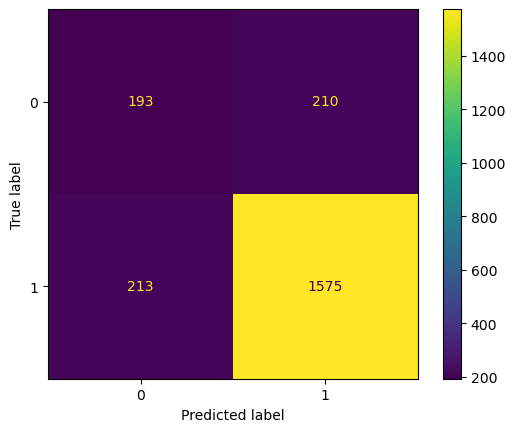

In [132]:
svc_model = SVC(
    C=10.0,
    kernel='rbf',
    gamma='scale',
    degree=2,
    random_state=42
)
svc_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(svc_model, X_test_scaled, y_test)

In [125]:
# Train classification model using SVM
def train_svm(X_train, y_train, X_test, y_test):
    """Function to train SVM model
    arg:
    X_train - training features
    y_train - training target
    """
    model = SVC(random_state=42)   
    params = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.8129929431299294
Accuracy: 0.8069374714742127
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       403
           1       0.88      0.88      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.68      0.68      0.68      2191
weighted avg       0.81      0.81      0.81      2191



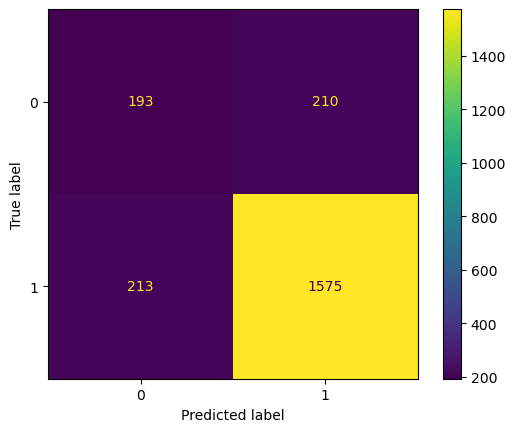

In [126]:
# Train SVM model with scaled data
svm_trainer = train_svm(X_train_scaled, y_train, X_test_scaled, y_test)

### MLP

Accuracy: 0.810588772250114
              precision    recall  f1-score   support

           0       0.49      0.67      0.56       403
           1       0.92      0.84      0.88      1788

    accuracy                           0.81      2191
   macro avg       0.70      0.76      0.72      2191
weighted avg       0.84      0.81      0.82      2191



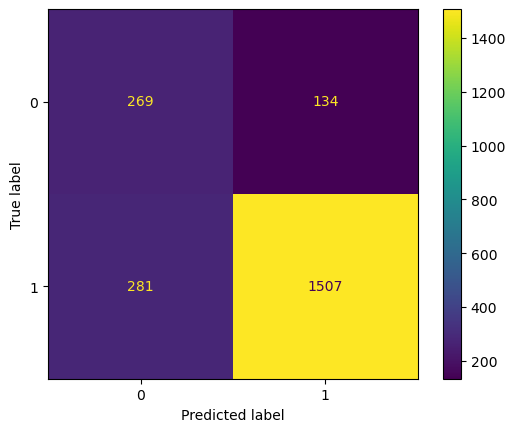

In [129]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, ),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    alpha=0.0001,
    max_iter=200,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(mlp_model, X_test_scaled, y_test)

In [16]:
# Train classification model using MLP
def train_mlp(X_train, y_train, X_test, y_test):
    """Function to train MLP model
    arg:
    X_train - training features
    y_train - training target
    """
    model = MLPClassifier(random_state=42)   
    params = {
        'hidden_layer_sizes': [(100,), (150,), (200,)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    }
    trainer = TrainModel(model, params)
    trainer.grid_search(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)
    return trainer.best_model

In [ ]:
# Train MLP model with scaled data
mlp_trainer = train_mlp(X_train_scaled, y_train, X_test_scaled, y_test)

### Voting Classifier

Accuracy: 0.8165221360109539
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       403
           1       0.87      0.91      0.89      1788

    accuracy                           0.82      2191
   macro avg       0.69      0.66      0.67      2191
weighted avg       0.81      0.82      0.81      2191



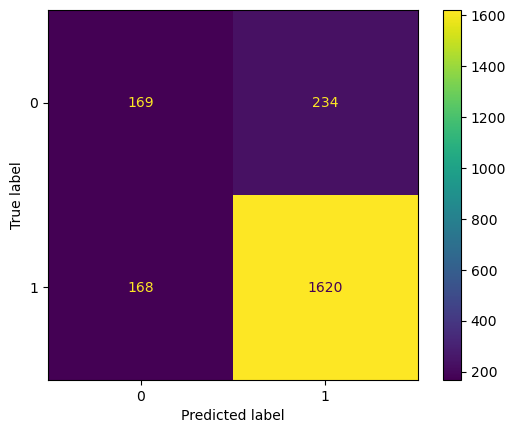

In [165]:
# Train Voting Classifier
vt_model = VotingClassifier(
    estimators=[
        #('lgbm', lgbm_model),
        #('rf', rf_model),
        #('xgb', xgb_model),
        #('cat', cat_model),
        ('ada', ada_model),
        #('knn', knn_model),
        ('lr', lr_model),
        ('svc', svc_model),
        #('mlp', mlp_model)
    ],
    weights=None,
    voting='hard'
)
vt_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(vt_model, X_test_scaled, y_test)

### Stacking Classifier

Accuracy: 0.8124144226380648
              precision    recall  f1-score   support

           0       0.49      0.36      0.42       403
           1       0.86      0.91      0.89      1788

    accuracy                           0.81      2191
   macro avg       0.68      0.64      0.65      2191
weighted avg       0.80      0.81      0.80      2191



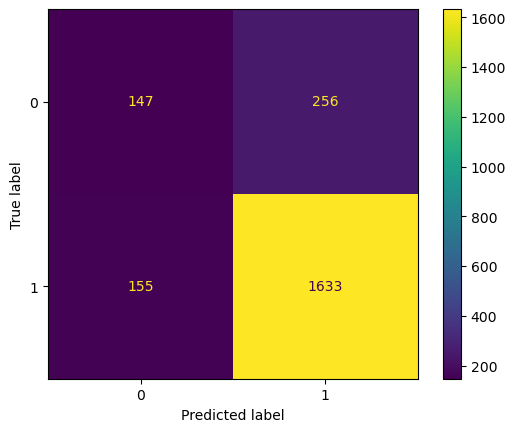

In [164]:
stack_model = StackingClassifier(
    estimators=[
        #('lgbm', lgbm_model),
        #('rf', rf_model),
        #('xgb', xgb_model),
        #('cat', cat_model),
        ('ada', ada_model),
        #('knn', knn_model),
        ('lr', lr_model),
        ('svc', svc_model),
        #('mlp', mlp_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
stack_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(stack_model, X_test_scaled, y_test)

### Ensemble of vt and stack

Accuracy: 0.8165221360109539
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       403
           1       0.87      0.91      0.89      1788

    accuracy                           0.82      2191
   macro avg       0.69      0.66      0.67      2191
weighted avg       0.81      0.82      0.81      2191



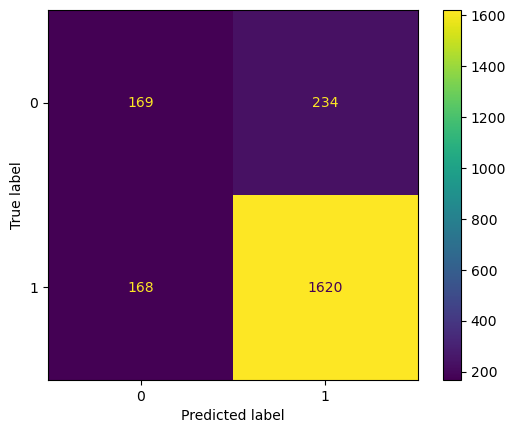

In [166]:
ensemble_model = VotingClassifier(
    estimators=[
        #('lgbm', lgbm_model),
        #('rf', rf_model),
        #('xgb', xgb_model),
        #('cat', cat_model),
        ('ada', ada_model),
        #('knn', knn_model),
        ('lr', lr_model),
        ('svc', svc_model),
        #('mlp', mlp_model),
        ('vt', vt_model),
        ('stack', stack_model)
    ],
    weights=None,
    voting='hard'
)
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate model
evaluate_model(ensemble_model, X_test_scaled, y_test)

## Build Submissions

In [18]:
# Make predictions on the test set
def make_predictions(model, test_df):
    """Function to make predictions on the test set
    arg:
    model - trained model
    test_df - test features
    filename - submission filename
    """
    preds = model.predict(test_df.drop("id", axis=1))
    sub = pd.DataFrame({'Id': test_df['id'], 'target': preds})
    return sub

In [19]:
# Baseline model predictions
sub = sample_sub.copy()
sub['target'] = majority_class
sub

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
...,...,...
2692,14964,1
2693,16774,1
2694,18884,1
2695,10000,1


In [22]:
# Make predictions on the test set
sub = make_predictions(lgbm_model, test)
sub

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
...,...,...
2692,14964,1
2693,16774,1
2694,18884,1
2695,10000,1


In [29]:
# prompt: change directory to drive
%cd ./submissions

/home/abookhadijah/Documents/ML_competitioons/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon20240918-4983-287w11/submissions


In [23]:
# Create a csv file
sub.to_csv('submission_lgbm_bs.csv', index = False)